# Composite two heatmaps horizontally for mouse DNA methylation array dataset
The dataset used in the following example was obtained from PMID: 36617464
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        

In [17]:
import os,sys
%matplotlib inline
# %matplotlib
import matplotlib.pylab as plt
from matplotlib.colors import LinearSegmentedColormap
import pickle
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi']=300
plt.rcParams['font.family']='sans serif'
plt.rcParams['font.sans-serif']='Arial'
plt.rcParams['pdf.fonttype']=42
# sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap/"))
import PyComplexHeatmap as pch
pch.use_pch_style()
print(pch.__version__)

1.7.7.dev0+gddb18da.d20240909


In [18]:
import pickle
import urllib
f=open("../data/influence_of_snp_on_beta.pickle",'rb')
data=pickle.load(f)
f.close()
beta,snp,df_row,df_col,col_colors_dict,row_colors_dict=data

In [19]:
# beta is DNA methylation beta values matrix, df_row and df_col are row and columns annotation respectively, col_colors_dict and row_colors_dict are color for annotation
print(beta.iloc[:,list(range(5))].head(5))
print(df_row.head(5))
print(df_col.head(5))
beta=beta.sample(2000)
snp=snp.loc[beta.index.tolist()]
df_row=df_row.loc[beta.index.tolist()]

                 204875570030_R01C02  204875570030_R04C01  \
cg30848532_TC21             0.525089             0.419515   
cg30147375_BC21             0.803776             0.585928   
cg46239718_BC21             0.443958             0.517514   
cg36100119_BC21             0.351977             0.528846   
cg42738582_BC21             0.783958             0.724901   

                 204875570030_R05C01  204875570030_R06C01  204875570035_R05C02  
cg30848532_TC21             0.483276             0.460750             0.390317  
cg30147375_BC21             0.510269             0.831463             0.550146  
cg46239718_BC21             0.535909             0.450167             0.564107  
cg36100119_BC21             0.524896             0.374422             0.551200  
cg42738582_BC21             0.802178             0.848621             0.850481  
                   chr  Target  CpG  ExtensionBase ProbeDesign CON  mapFlag  \
cg30848532_TC21  chr12       1    1              0          II   C  

In [20]:
row_colors_dict

{'Group': {'Artificial high meth. reading': 'darkorange',
  'Artificial low meth. reading': 'skyblue',
  'G-R': 'red',
  'No Effect': 'wheat',
  'R-G': 'green',
  'Suboptimal hybridization': 'darkgray'},
 'Target': {0: 'yellowgreen', 1: 'orangered'}}

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Starting plotting HeatmapAnnotations
Plotting legends..
Estimated legend width: 69.4986111111111 mm


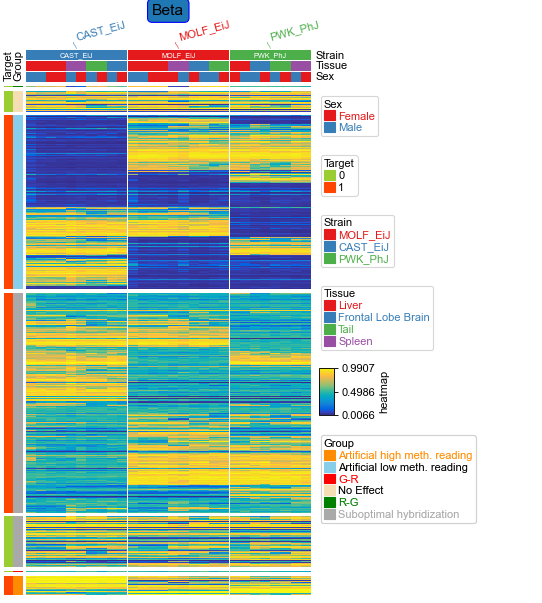

In [21]:
row_ha = pch.HeatmapAnnotation(
            Target=pch.anno_simple(df_row.Target,colors=row_colors_dict['Target'],rasterized=True),
            Group=pch.anno_simple(df_row.Group,colors=row_colors_dict['Group'],rasterized=True),
            axis=0)
col_ha= pch.HeatmapAnnotation(
            label=pch.anno_label(df_col.Strain,merge=True,rotation=15),
            Strain=pch.anno_simple(df_col.Strain,add_text=True),
            Tissue=df_col.Tissue,Sex=df_col.Sex,
            axis=1)
plt.figure(figsize=(5, 8))
cm = pch.ClusterMapPlotter(
        data=beta, top_annotation=col_ha, left_annotation=row_ha,
        show_rownames=False,show_colnames=False,
        row_dendrogram=False,col_dendrogram=False,
        row_split=df_row.loc[:, ['Target', 'Group']],
        col_split=df_col['Strain'],cmap='parula',
        rasterized=True,row_split_gap=1,legend=True,
        legend_anchor='ax_heatmap',legend_vpad=5,
        xlabel='Beta',xlabel_side='top',
        xlabel_kws=dict(color='black',fontsize=14,labelpad=15),#increace labelpad manually using labelpad (points)
        xlabel_bbox_kws=dict(fill=True,edgecolor='blue',boxstyle='round'),
)
# cm.ax.set_title("Beta",y=1.03,fontdict={'fontweight':'bold'})
#plt.savefig("clustermap.pdf", bbox_inches='tight')
plt.show()

In [22]:
row_ha = pch.HeatmapAnnotation(
            Target=pch.anno_simple(df_row.Target, colors=row_colors_dict['Target'], rasterized=True),
            Group=pch.anno_simple(df_row.Group, colors=row_colors_dict['Group'], rasterized=True),
            axis=0)

col_ha1 = pch.HeatmapAnnotation(
            #label=pch.anno_label(df_col.Strain, merge=True, rotation=15),,
            Strain=pch.anno_simple(df_col.Strain, add_text=True,
                              text_kws={'fontweight':'bold'}),
            Tissue=df_col.Tissue, Sex=df_col.Sex,
            axis=1,verbose=0)  # df=df_col.loc[:,['Strain','Tissue','Sex']],

cm1 = pch.ClusterMapPlotter(
            data=beta, top_annotation=col_ha1, left_annotation=None,
            show_rownames=False, show_colnames=False,
            row_dendrogram=False, col_dendrogram=False,
            row_split=df_row.loc[:, ['Target', 'Group']],
            col_split=df_col['Strain'], cmap='parula', #turbo, parula, viridis,
            rasterized=True, row_split_gap=0.1,vmax=1,vmin=0,center=0.5,
            plot=False,label='beta',
            xlabel='Beta',xlabel_side='top',
            xlabel_kws=dict(color='black',fontsize=14,labelpad=10),#increace labelpad manually using labelpad (points)
            xlabel_bbox_kws=dict(fill=True,edgecolor='blue',boxstyle='round')
)

col_ha2 = pch.HeatmapAnnotation(
            #label=pch.anno_label(df_col.Strain, merge=True, rotation=15),,
            Strain=pch.anno_simple(df_col.Strain, add_text=True,
                             text_kws={'fontweight':'bold'}),
            Tissue=df_col.Tissue, Sex=df_col.Sex,
            label_kws={'visible':False},axis=1,verbose=0)

my_cmap = LinearSegmentedColormap.from_list('my_cmap', [(0, 'lightgray'), (1, 'black')])
cm2 = pch.ClusterMapPlotter(
            data=snp, top_annotation=col_ha2, left_annotation=row_ha,
            show_rownames=False, show_colnames=False,
            row_dendrogram=False, col_dendrogram=False,
            col_cluster_method='ward',row_cluster_method='ward',
            col_cluster_metric='jaccard',row_cluster_metric='jaccard',
            row_split=df_row.loc[:, ['Target', 'Group']],
            col_split=df_col['Strain'],
            rasterized=True, row_split_gap=0.1,
            plot=False,cmap=my_cmap,label='SNP',
            xlabel='SNP',xlabel_side='top',
            xlabel_kws=dict(color='black',fontsize=14,labelpad=10),#increace labelpad manually using labelpad (points)
            xlabel_bbox_kws=dict(fill=True,edgecolor='red',boxstyle='round',facecolor='pink')
) # or cmap='gray' or Greys,
cmlist=[cm2,cm1]

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Starting plotting HeatmapAnnotations
Starting plotting..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Estimated legend width: 69.4986111111111 mm


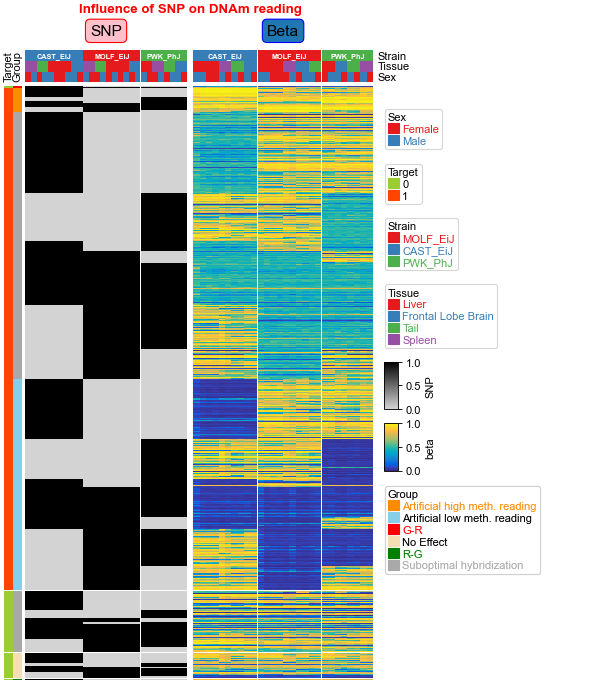

In [23]:
plt.figure(figsize=(6,9))
ax,legend_axes=pch.composite(cmlist=cmlist, main=0,legend_hpad=2,col_gap=0.1)
# cm1.ax.set_title("title1",y=1.03)
# cm2.ax.set_title("title2",y=1.03)
ax.set_title("Influence of SNP on DNAm reading",y=1.05,fontdict={'fontweight':'bold','color':'red'})
plt.savefig("beta_snp.pdf", bbox_inches='tight')
plt.show()